In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

In [2]:

# Step 1: Data cleaning
data = yf.download(tickers='BTC-usd', period='max', interval='1d')
data.dropna(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21086.792969,21152848261
2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,22676.552734,28799154319
2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,32442278429


In [3]:
# Step 2: Feature engineering
data['RSI'] = ta.rsi(data.Close, length=15)
data['EMA_short'] = ta.ema(data.Close, length=20)
data['EMA_long'] = ta.ema(data.Close, length=100)
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop([ 'Close'], axis=1, inplace=True)
data

,Date,Open,High,Low,Adj Close,Volume,RSI,EMA_short,EMA_long
0,2014-12-25,322.286011,322.670013,316.958008,319.007996,9883640,38.229085,337.460187,366.468409
1,2014-12-26,319.152008,331.424011,316.627014,327.924011,16410500,43.088077,336.551980,365.705154
2,2014-12-27,327.583008,328.911011,312.630005,315.863007,15185200,38.678402,334.581601,364.718181
3,2014-12-28,316.160004,320.028015,311.078003,317.239014,11676600,39.436044,332.929926,363.777999
4,2014-12-29,317.700989,320.266998,312.307007,312.670013,12302500,37.775595,331.000411,362.765960
...,...,...,...,...,...,...,...,...,...
2947,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21152848261,79.591583,19054.615247,18422.009112
2948,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,28799154319,85.132868,19399.561674,18506.257500
2949,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,32442278429,85.402849,19721.281991,18590.839035
2950,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,24746386230,84.472562,20006.913803,18672.612837


In [4]:
# Step 3: Data normalization (cont.)
#scaler = MinMaxScaler()
#data[['Open', 'High', 'Low', 'Volume', 'Close', 'RSI', 'EMA_short', 'EMA_long']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume', 'Close', 'RSI', 'EMA_short', 'EMA_long']])
#data
scaler = MinMaxScaler()
data_close = data[['Adj Close']]
data_close = scaler.fit_transform(data_close)
data_close

array([[0.00209093],
       [0.00222324],
       [0.00204426],
       ...,
       [0.33536058],
       [0.33451164],
       [0.3370511 ]])

In [5]:
# Step 4: Splitting the data
X = data[['Open', 'High', 'Low', 'Volume', 'RSI', 'EMA_short', 'EMA_long']]
X = scaler.fit_transform(X)
y = data_close
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print('X', X)


X [[0.00215798 0.00161771 0.00219675 ... 0.33194122 0.0017274  0.00227644]
 [0.00211146 0.00174536 0.00219175 ... 0.39037668 0.00171298 0.00226249]
 [0.0022366  0.00170871 0.00213138 ... 0.33734483 0.00168169 0.00224446]
 ...
 [0.33397036 0.33641477 0.33741334 ... 0.89926468 0.30950664 0.33524577]
 [0.33546293 0.33312483 0.33554153 ... 0.88807682 0.31404195 0.33673982]
 [0.3343156  0.3319165  0.33986118 ... 0.89437621 0.31840411 0.33826621]]


In [6]:
# Step 5: Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("x", X.shape)
print('y',y.shape)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('Y_test', y_test.shape) 
print('X_train.shape[1]', X_train.shape[1])
print('X_train.shape[2]', X_train.shape[2])

x (2952, 7)
y (2952, 1)
X_train (2361, 1, 7)
y_train (2361, 1)
X_test (591, 1, 7)
Y_test (591, 1)
X_train.shape[1] 1
X_train.shape[2] 7


In [8]:
# Step 6: Building the GRU model (cont.)

model = Sequential()
model.add(GRU(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True , activation= 'softmax'))
model.add(Dropout(0.2))
model.add(GRU(100, activation= 'softmax'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 100)            32700     
                                                                 
 dropout_2 (Dropout)         (None, 1, 100)            0         
                                                                 
 gru_3 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 93,401
Trainable params: 93,401
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Step 7: Training and evaluating the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
74/74 [==============================] - 6s 17ms/step - loss: 0.0357 - val_loss: 0.2164
Epoch 2/250
74/74 [==============================] - 1s 8ms/step - loss: 0.0311 - val_loss: 0.1969
Epoch 3/250
74/74 [==============================] - 1s 8ms/step - loss: 0.0310 - val_loss: 0.1973
Epoch 4/250
74/74 [==============================] - 1s 8ms/step - loss: 0.0309 - val_loss: 0.1951
Epoch 5/250
74/74 [==============================] - 1s 10ms/step - loss: 0.0304 - val_loss: 0.1896
Epoch 6/250
74/74 [==============================] - 1s 10ms/step - loss: 0.0292 - val_loss: 0.1747
Epoch 7/250
74/74 [==============================] - 1s 10ms/step - loss: 0.0271 - val_loss: 0.1553
Epoch 8/250
74/74 [==============================] - 1s 10ms/step - loss: 0.0234 - val_loss: 0.1248
Epoch 9/250
74/74 [==============================] - 1s 9ms/step - loss: 0.0180 - val_loss: 0.0839
Epoch 10/250
74/74 [==============================] - 1s 8ms/step - loss: 0.0118 - val_loss: 0.0474
Epoc

In [10]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score:.4f}')

Test loss: 0.0005


In [12]:

# Step 8: Tuning the Hyperparameters
# You can use techniques such as grid search or random search to find the best values for the model's hyperparameters

# Step 9: Testing the model
y_pred = model.predict(X_test)
print('y_pred',y_pred.shape)
print('y_test',y_test.shape)
#y_pred = y_pred.reshape(-1,1)
#y_pred = np.nan_to_num(y_pred)
#y_pred = scaler.inverse_transform(y_pred)
#y_pred = scaler.inverse_transform(y_pred[:,[-1]])
#y_test = scaler.inverse_transform(y_test)
#y_test = np.nan_to_num(y_test)


#evaluat
mse = mean_squared_error(y_test, y_pred )
mae = mean_absolute_error(y_test, y_pred)
mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("MAPE: {:.4f}%".format(mape))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("MAE:{:.4f}".format(mae))

19/19 [==============================] - 0s 5ms/step
y_pred (591, 1)
y_test (591, 1)
MAPE: 3.4040%
RMSE: 0.0229
MSE: 0.0005
MAE:0.0180


In [13]:
# Calculate mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

mape_value = mape(y_test, y_pred)
print(f'MAPE: {mape_value:.4f}%')

MAPE: 3.4040%


In [14]:
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

SMAPE1 = smape(y_test, y_pred)
print("smape: {:.4f}%".format(SMAPE1))

smape: 3.3970%


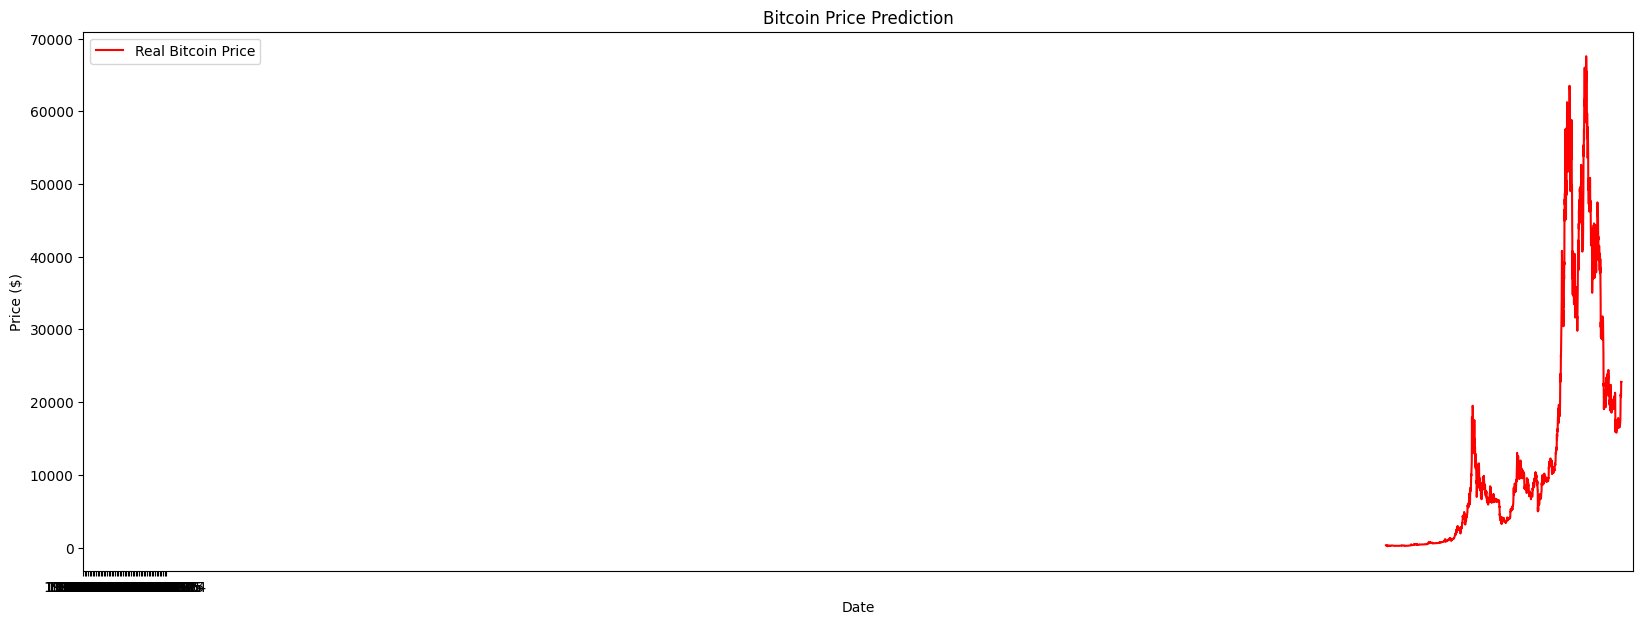

In [30]:
plt.figure(figsize=(20,7))
plt.plot(data['Date'].values, data['Adj Close'], color = 'red', label = 'Real Bitcoin Price')
#plt.plot(data['Date'][-y_pred.shape[0]:].values, y_pred, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,data[1800:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()